<a href="https://colab.research.google.com/github/PrathameshMistry/Electric-Vehicle-market-in-India-using-Segmentation-/blob/main/Electric_Vehicle_market_in_India_using_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Display the dataset and its columns to confirm structure
print(df.head())
print(df.columns)

Saving Electric Vehicle market in India using Segmentation .csv to Electric Vehicle market in India using Segmentation  (6).csv
   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0           Yes         No           No   800000            0        800000   
1           Yes        Yes          Yes  1400000       600000       2000000   
2           Yes        Yes           No  1800000            0       1800000   
3            No         No          Yes  1600000       600000       2200000   
4           Yes         No          Yes  1800000       8

In [ ]:
df.describe()
df.columns
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make','Location']:
    print(col, ':', df[col].unique())
# Observing Column entries
for col in df.columns:
  print(df[col].value_counts())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']
Location : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Age
36    13
35    10
31     8
41     7
34     7
27     6
37     6
42     5
30     5
39     4
44     4
29     4
51     3
49     3
28     3
43     2
33     2
32     2
45     2
46     1
50     1
26     1
Name: count, dtype: int64
Profession
Salaried    64
Business    35
Name: count, dtype: int64
Marrital Status
Married    84
Single     15
Name: count, dtype: int64
Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64
No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64
Personal loan
No     67
Yes    32
Name: count, dtype: int64
House Loan
No   

In [ ]:
## Double checking the percentage of empty entries column wise
df.isnull().sum() / df.shape[0] * 100.00

,0
Age,0.0
Profession,0.0
Marrital Status,0.0
Education,0.0
No of Dependents,0.0
Personal loan,0.0
House Loan,0.0
Wife Working,0.0
Salary,0.0
Wife Salary,0.0


In [ ]:
df.loc[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Location
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000,Kolkata


In [ ]:
df=df.replace(to_replace ="m", value ="No")
df.loc[11]

,11
Age,35
Profession,Salaried
Marrital Status,Married
Education,Graduate
No of Dependents,4
Personal loan,Yes
House Loan,Yes
Wife Working,No
Salary,1400000
Wife Salary,0


<ipython-input-73-cd84c6dcd215>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-73-cd84c6dcd215>:19: UserWarning:


The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.

<ipython-input-73-cd84c6dcd215>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-73-cd84c6dcd215>:19: UserWarning:


The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.

<ipython-input-73-cd84c6dcd215>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipytho

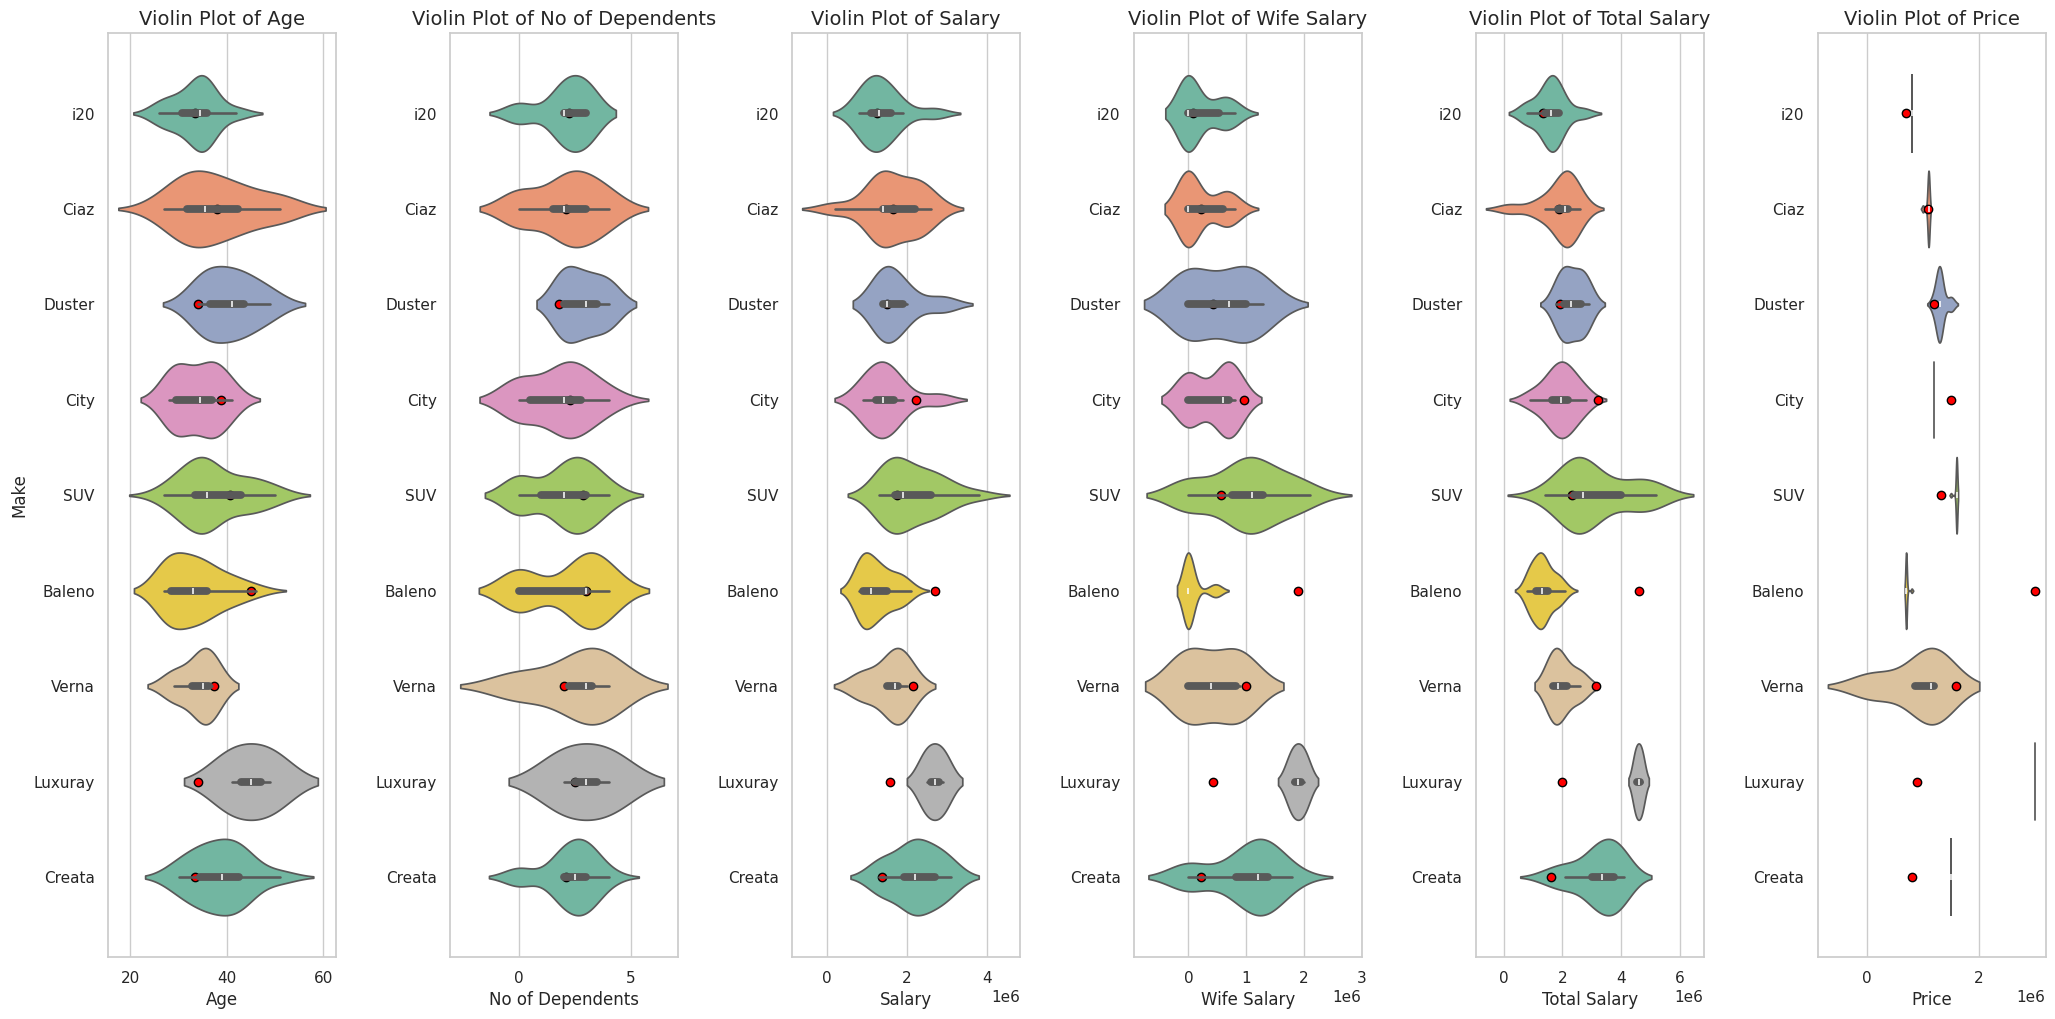

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(25,12))
n = 0
cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

for col in cols:
    n += 1
    plt.subplot(1, len(cols), n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # Set a beautiful color palette
    palette = sns.color_palette("Set2")

    # Create the violin plot
    sns.violinplot(x=col, y='Make', data=df, palette=palette)

    # Add mean markers
    means = df.groupby('Make')[col].mean()
    for y, mean in enumerate(means):
        plt.scatter(mean, y, color='red', edgecolor='black')

    # Customize the y-axis label
    plt.ylabel("Make" if n == 1 else '', fontsize=12)

    # Set a title for each subplot
    plt.title(f'Violin Plot of {col}', fontsize=14)

# Show the plot
plt.show()


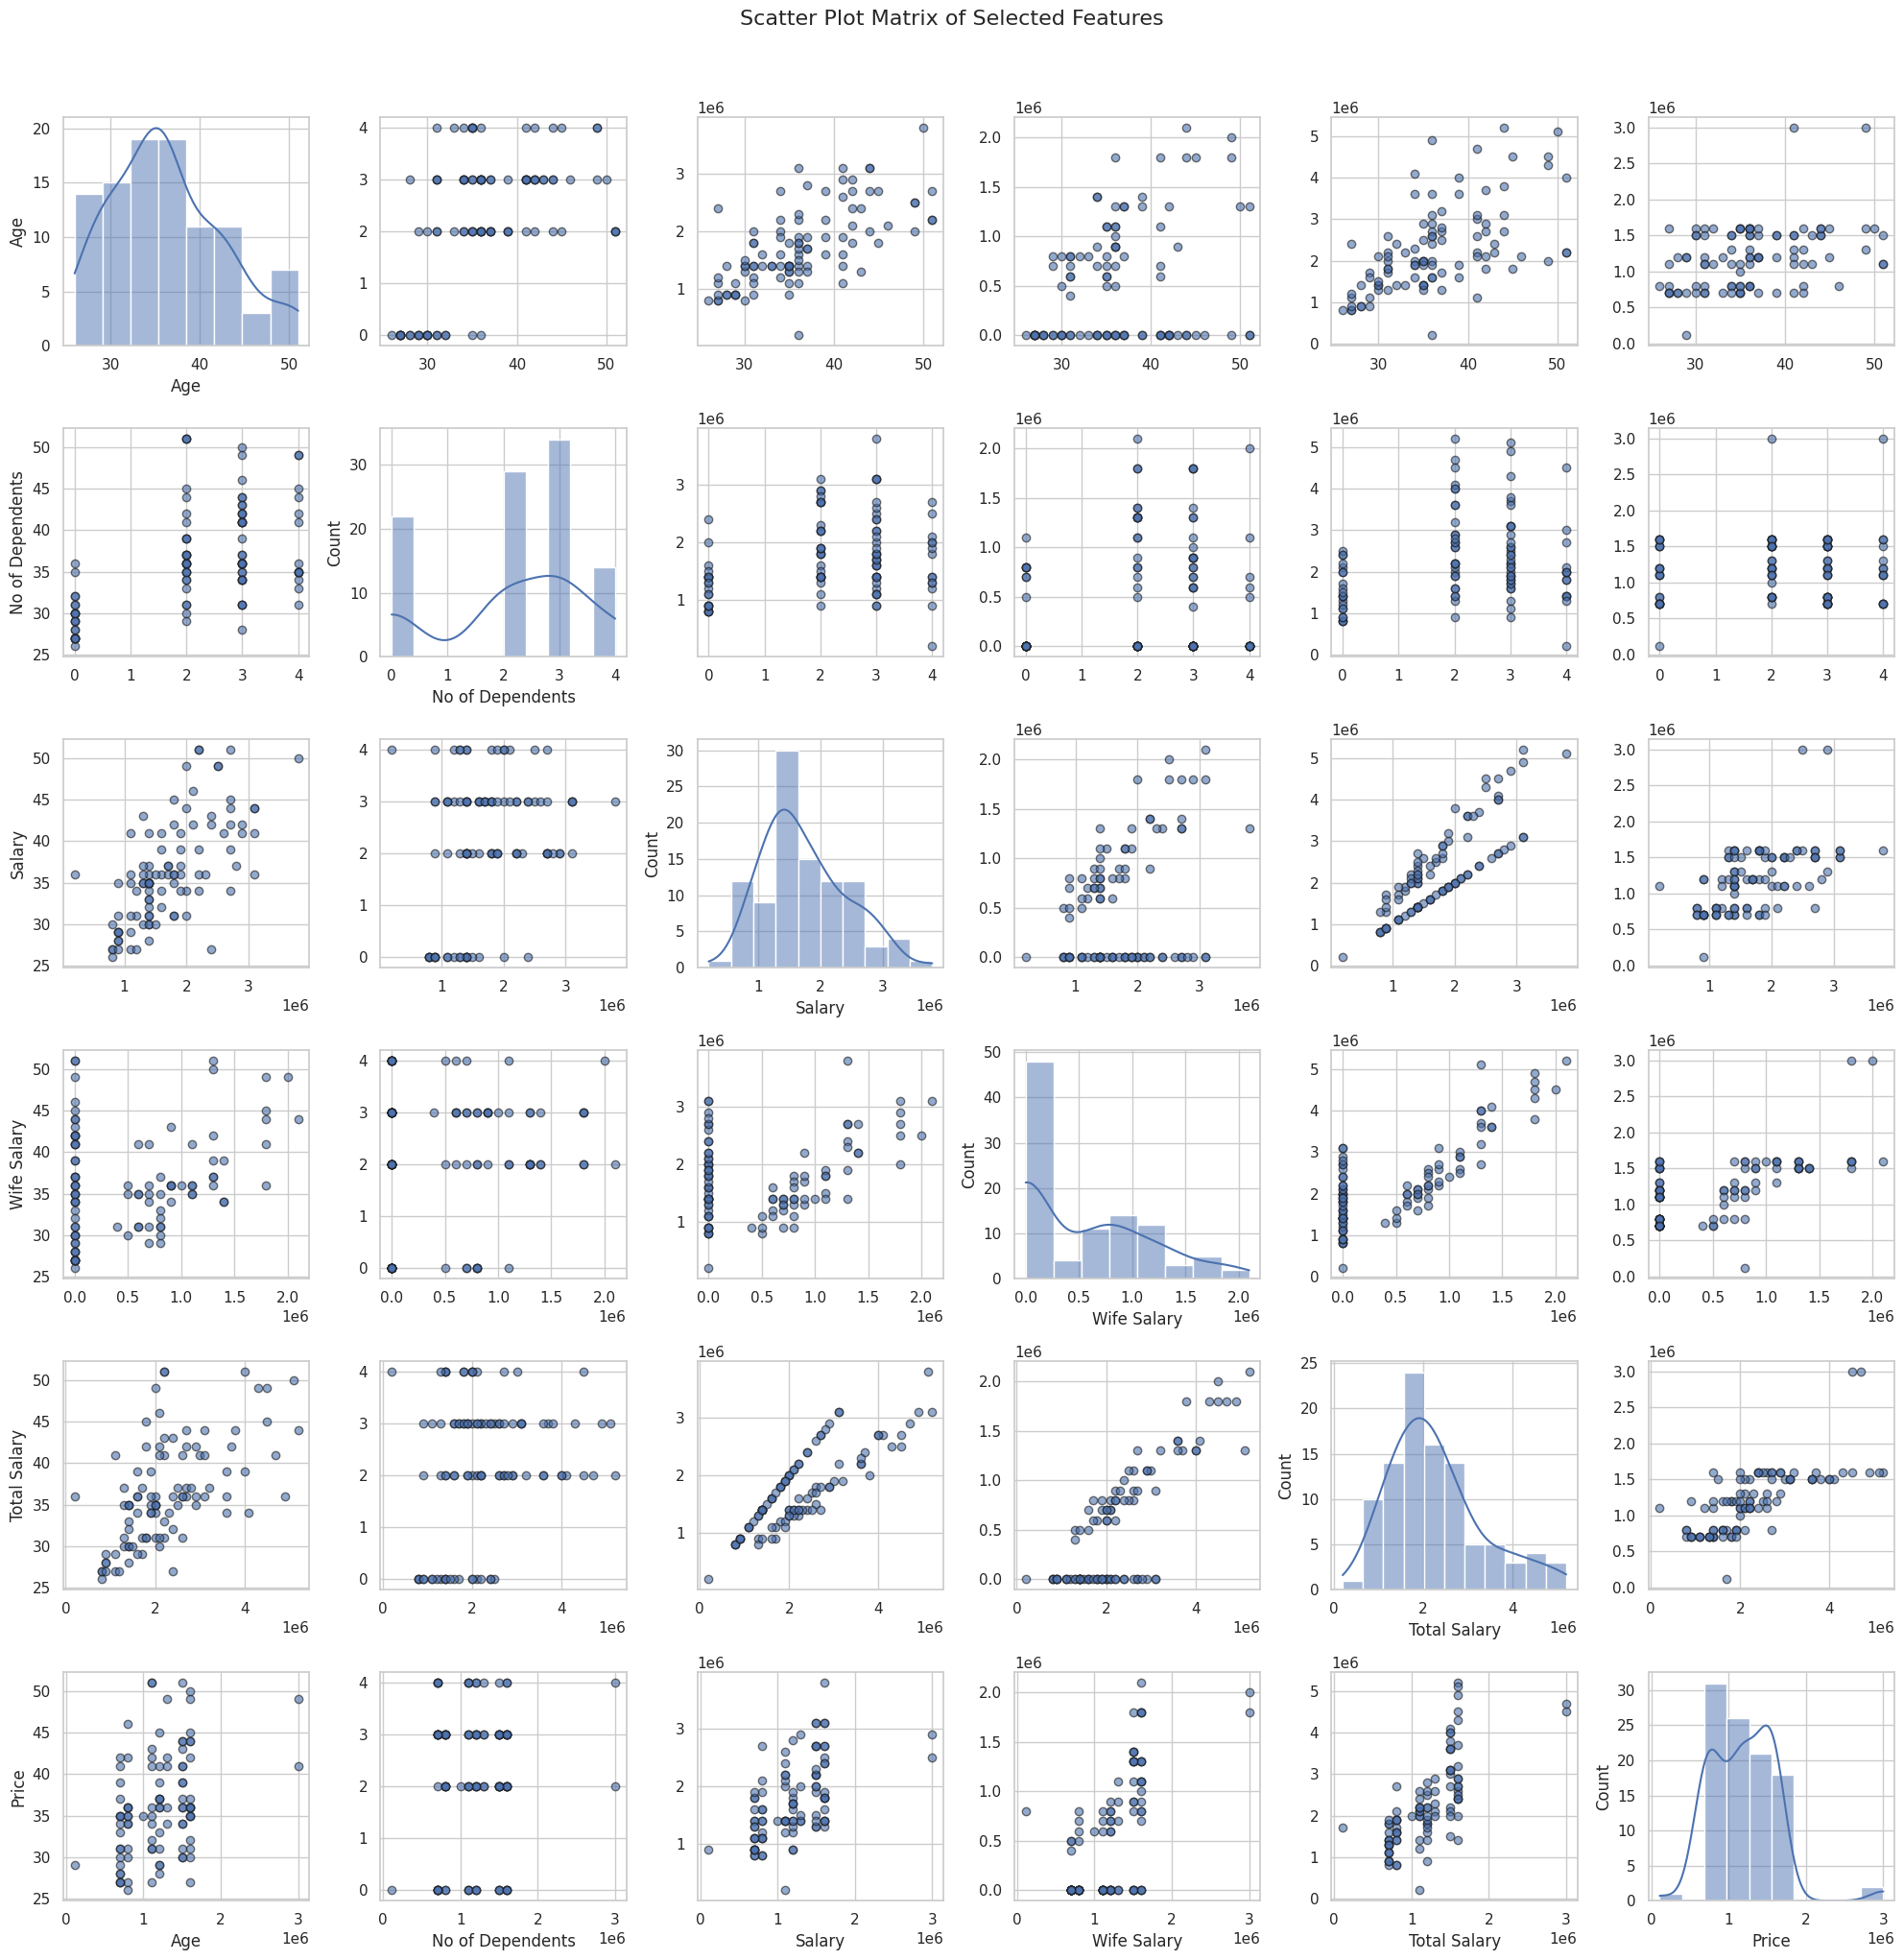

In [ ]:
##################                     Inspect the data types of the columns.
##################     Convert columns to numeric, forcing any non-numeric values to NaN.
##################               Drop rows with NaN values in the selected columns.
##################                            Generate the scatter plots.

import matplotlib.pyplot as plt

# Function to create scatter plots for each pair of variables
def create_scatter_plots(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(20, 20))
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i == j:
                # Diagonal plots: histogram
                sns.histplot(df[col1], ax=axes[i, j], kde=True)
            else:
                # Off-diagonal plots: scatter plot
                axes[i, j].scatter(df[col1], df[col2], alpha=0.6, edgecolor='k')
            if i == num_cols - 1:
                axes[i, j].set_xlabel(col2)
            if j == 0:
                axes[i, j].set_ylabel(col1)
    plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

create_scatter_plots(df_cleaned, scatter_columns)



<ipython-input-22-0a34af66caec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')


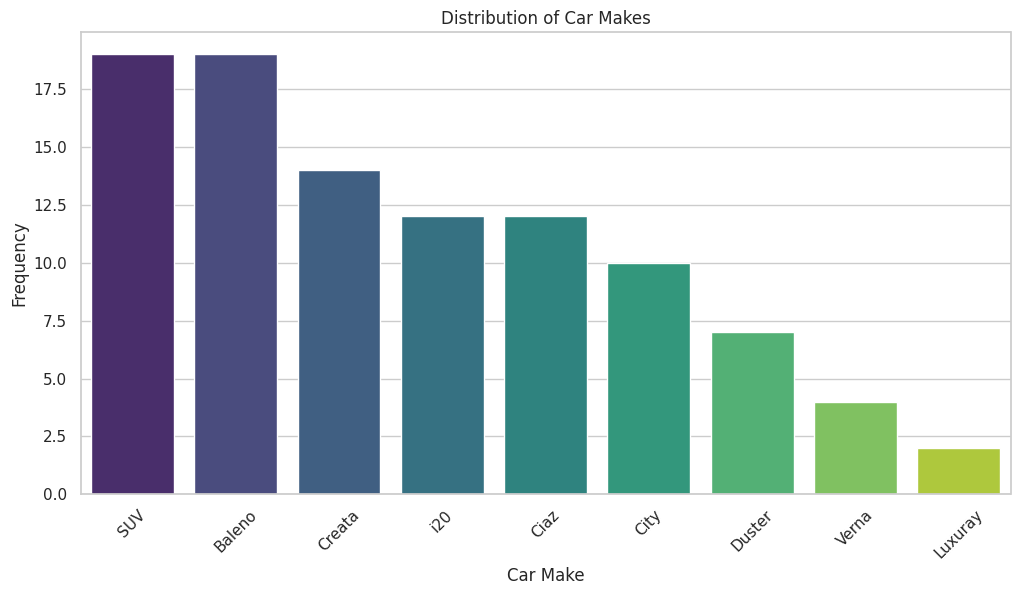

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
#####   Analyze car make distributions  by Frequency Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each car make
make_counts = df['Make'].value_counts()

# Create a bar plot for the car make distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')
plt.title('Distribution of Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# Calculate summary statistics for numerical columns grouped by car make
make_summary = df.groupby('Make')[['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']].agg(['mean', 'median'])

import ace_tools as tools; tools.display_dataframe_to_user(name="Car Make Summary Statistics", dataframe=make_summary)
make_summary


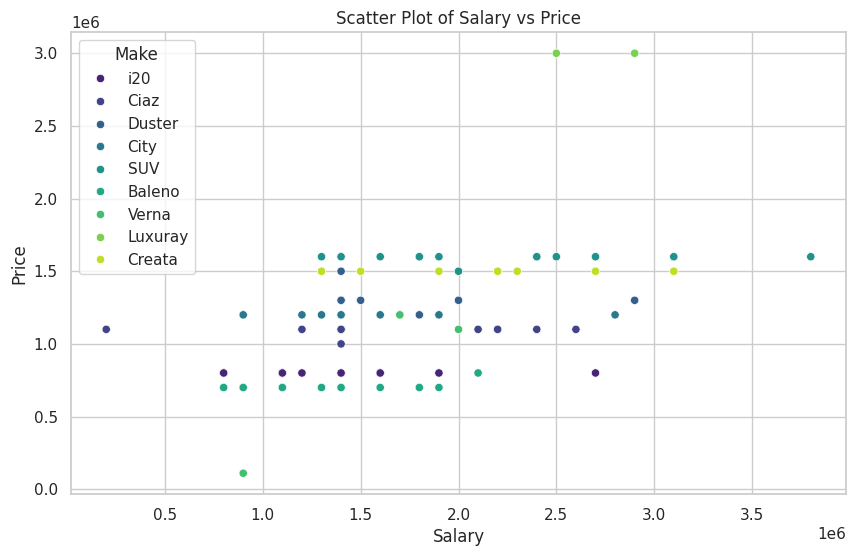

Slope: 0.3558304031400769
Intercept: 576189.4313153614
R-squared: 0.2998983230971292
P-value: 4.462247867117855e-09
Standard Error: 0.05520148051907565


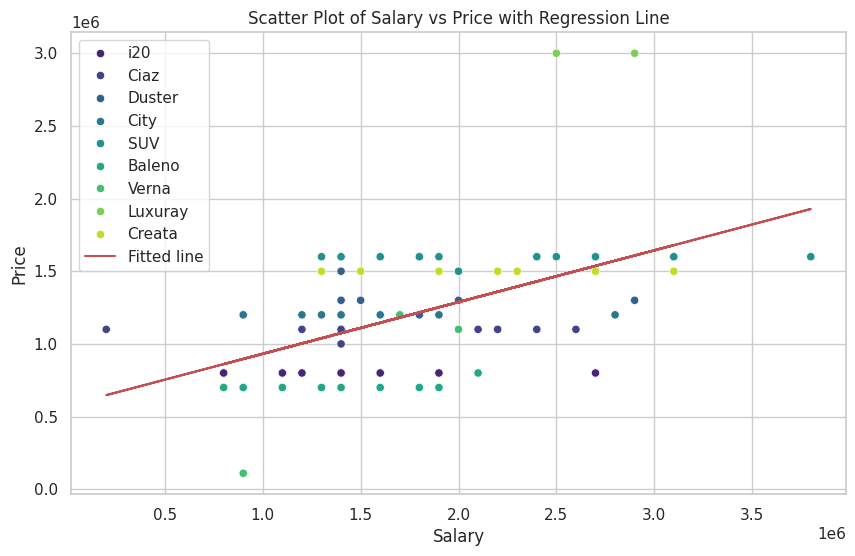

In [ ]:
######               Analyze relationship between salary and price by Scatter Plot , Regression Analysis and Visualize with Regression Line
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Salary vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='Price', data=df_cleaned, hue='Make', palette='viridis')
plt.title('Scatter Plot of Salary vs Price')
plt.xlabel('Salary')
plt.ylabel('Price')
plt.show()
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['Salary'], df_cleaned['Price'])

# Display regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='Price', data=df_cleaned, hue='Make', palette='viridis')
plt.plot(df_cleaned['Salary'], intercept + slope * df_cleaned['Salary'], 'r', label='Fitted line')
plt.title('Scatter Plot of Salary vs Price with Regression Line')
plt.xlabel('Salary')
plt.ylabel('Price')
plt.legend()
plt.show()



<ipython-input-30-e3844bcde49b>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Make', y='mean', data=price_stats, hue='Make', palette='viridis', dodge=False, ci=None)


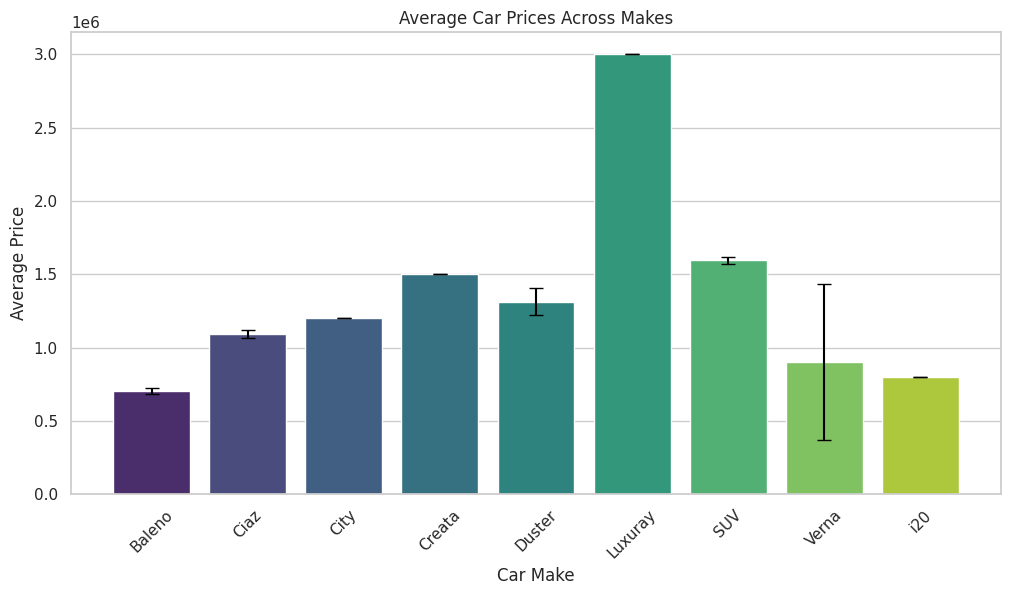

In [ ]:
####                                   Compare average prices across makes
####                                  Calculate Mean and Standard Deviation
###                                         Bar Plot with Error Bars

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

price_stats = df.groupby('Make')['Price'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='mean', data=price_stats, hue='Make', palette='viridis', dodge=False, ci=None)
for index, row in price_stats.iterrows():
    plt.errorbar(x=index, y=row['mean'], yerr=row['std'], fmt='none', c='black', capsize=5)

plt.title('Average Car Prices Across Makes')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show()



<ipython-input-32-465298229919>:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  countplot = sns.countplot(x="Make", data=df, hue="Age", palette=palette)


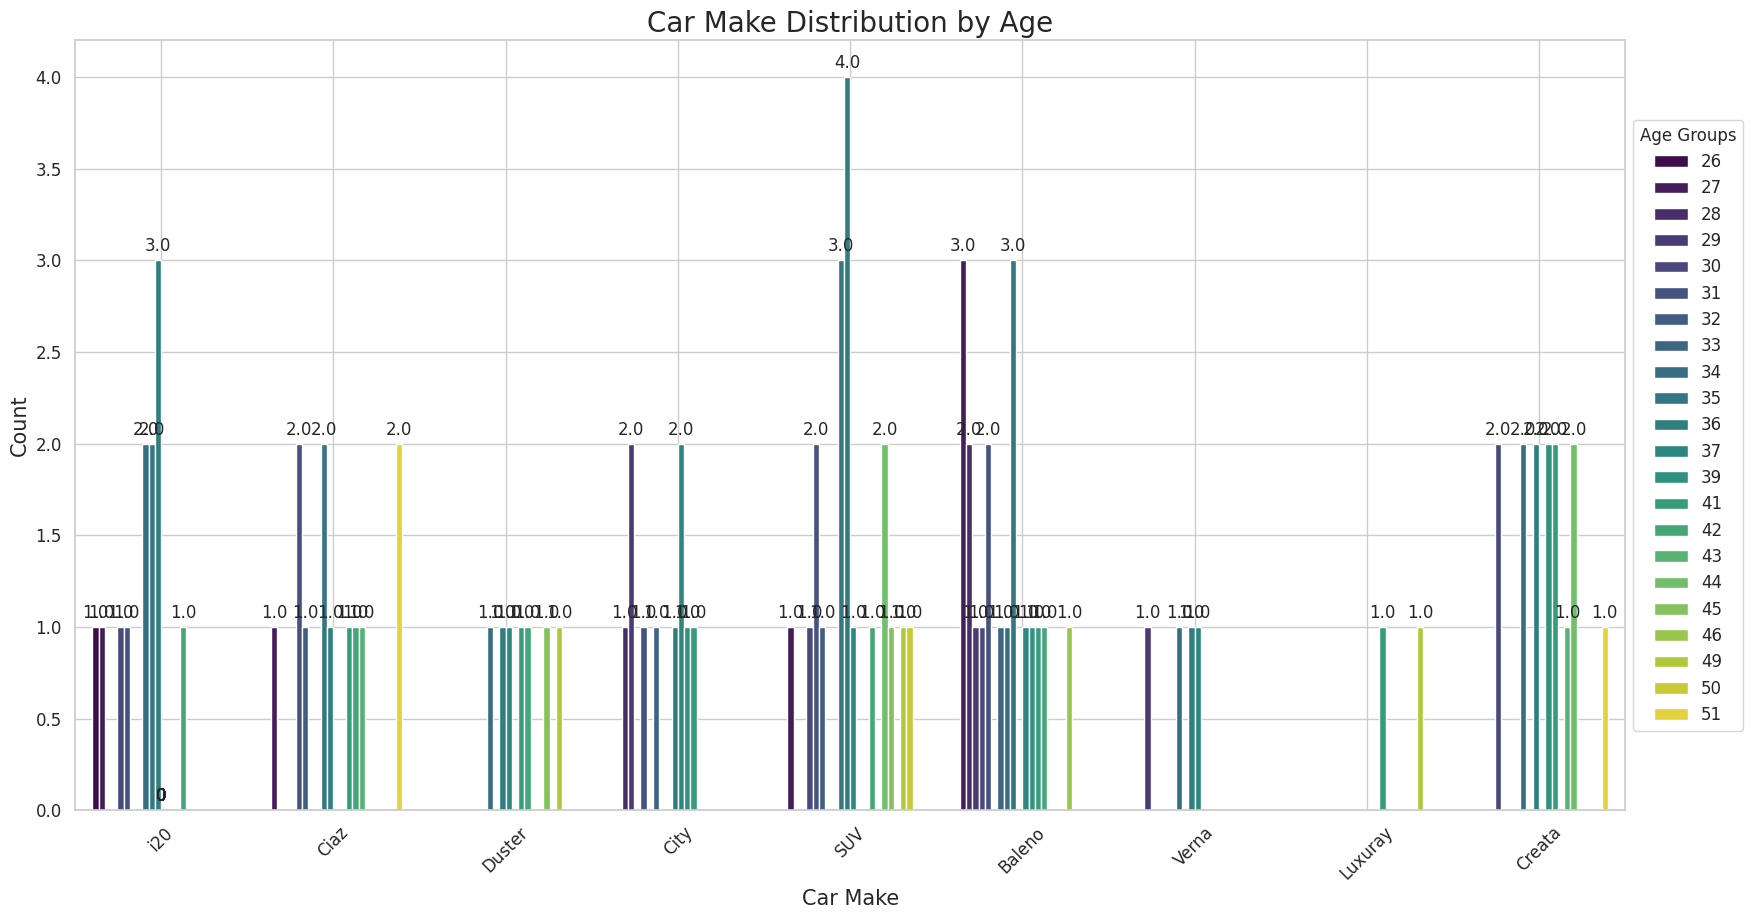

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

# Create a custom color palette from 'viridis'
palette = cm.get_cmap('viridis', df['Age'].nunique()).colors

# Create the count plot
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

# Plot countplot with custom palette and adjustments
countplot = sns.countplot(x="Make", data=df, hue="Age", palette=palette)

# Add data labels to each bar
for p in countplot.patches:
    height = p.get_height()
    countplot.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Age Groups", fontsize=12)
plt.title('Car Make Distribution by Age', fontsize=20)
plt.xlabel('Car Make', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


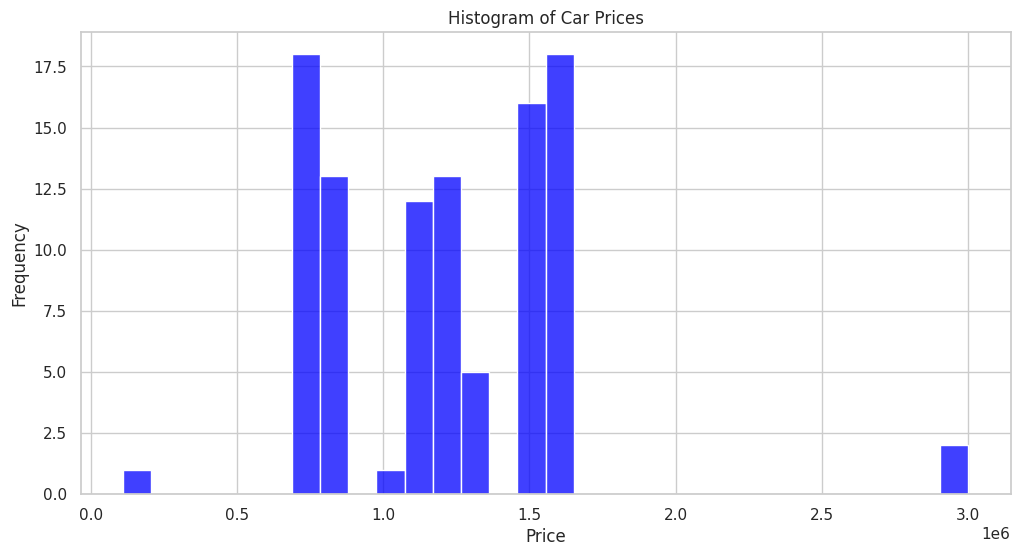

In [ ]:
#####        Show price distribution with different plots  like   Histogram , Box Plot , Violin Plot ,Density Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=False, color='blue')
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


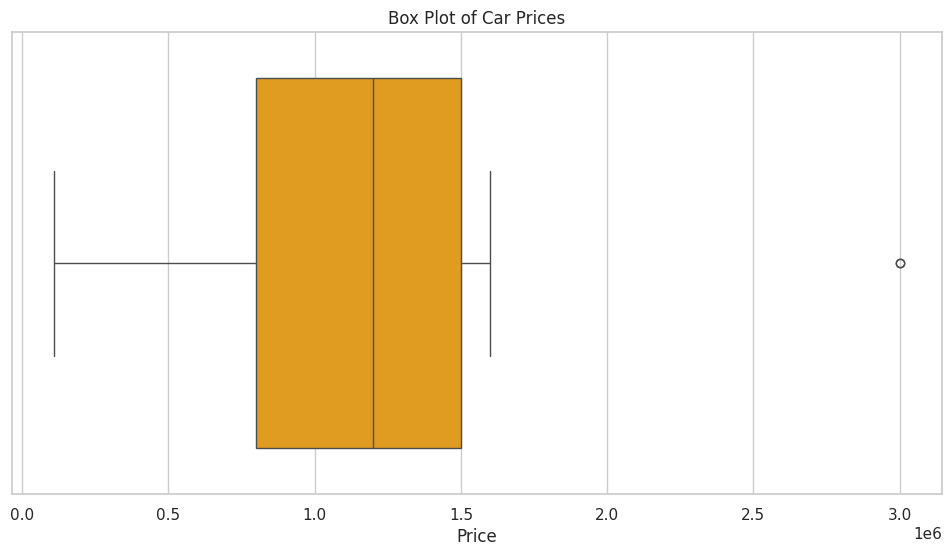

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'], color='orange')
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()


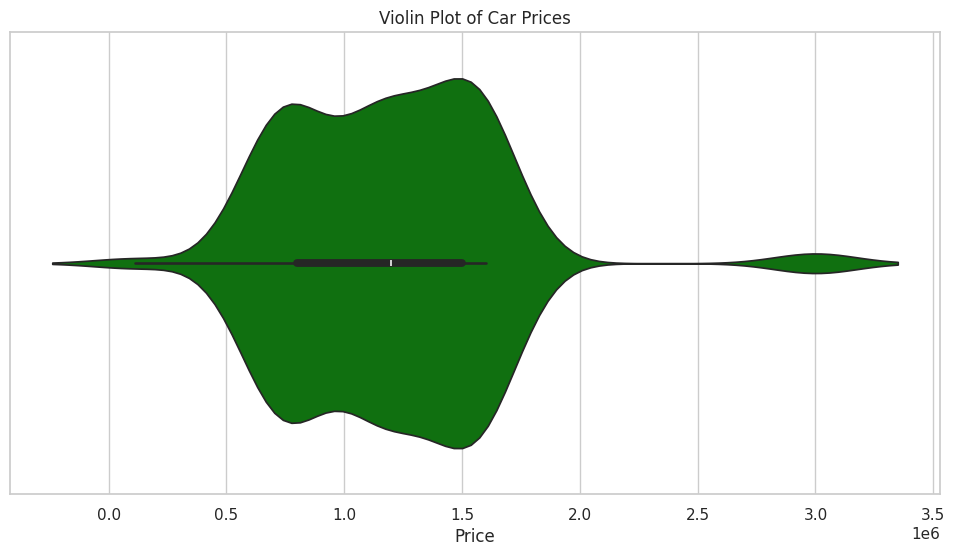

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Price'], color='green')
plt.title('Violin Plot of Car Prices')
plt.xlabel('Price')
plt.show()


<ipython-input-36-72e7e9ab8250>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True, color='red')


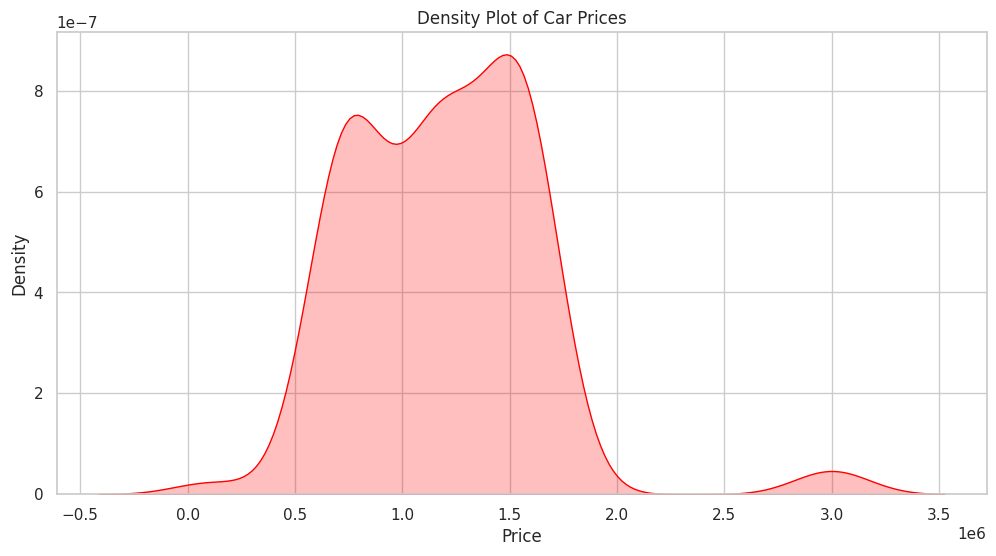

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Price'], shade=True, color='red')
plt.title('Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


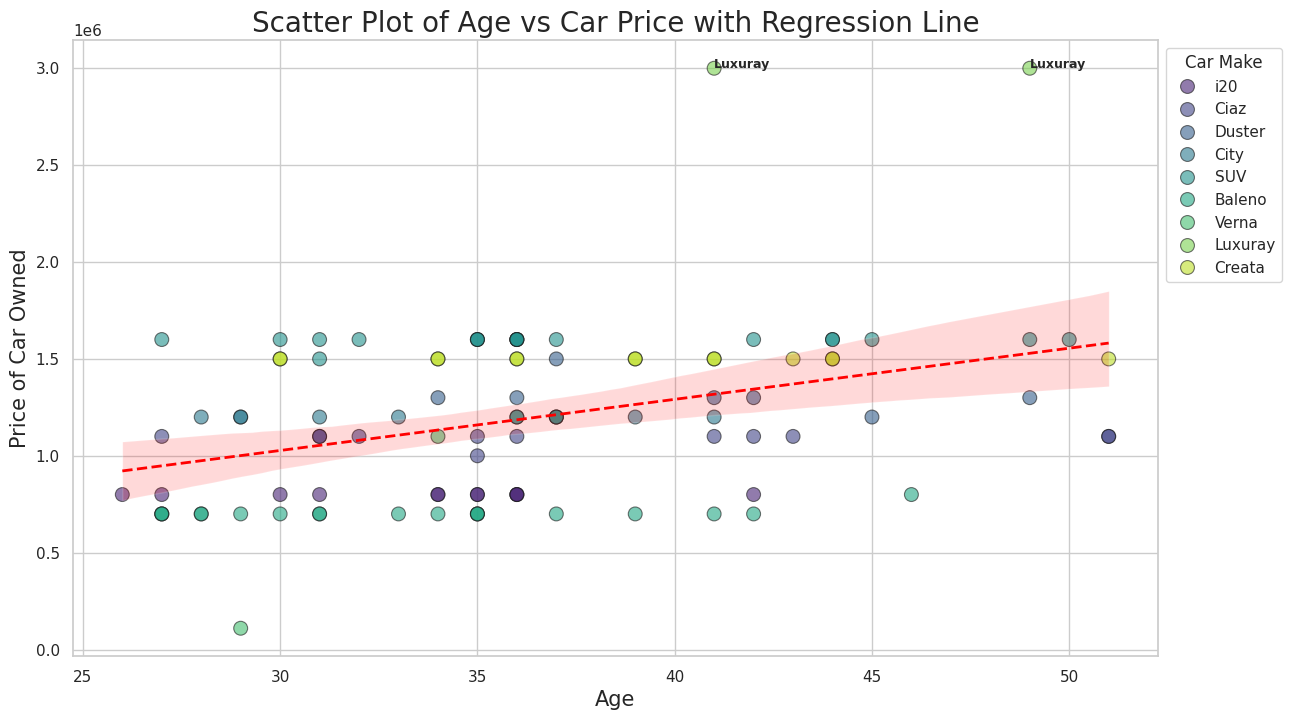

In [ ]:
###################                      Scatter Plot Of Age Vs Car Price With Regression Line

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#  scatter plot with a regression line
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(x='Age', y='Price', data=df, hue='Make', palette='viridis', s=100, edgecolor='k', alpha=0.6)
# regression line
sns.regplot(x='Age', y='Price', data=df, scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': 'dashed'})
# Annotate some points for emphasis
for i in range(len(df)):
    if df['Price'].iloc[i] > 2500000:  # Example condition for annotation
        scatter_plot.text(df['Age'].iloc[i], df['Price'].iloc[i], df['Make'].iloc[i], fontsize=9, weight='bold')
plt.title('Scatter Plot of Age vs Car Price with Regression Line', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Price of Car Owned', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Car Make")
plt.grid(True)
plt.show()


In [ ]:
######                  Stacked Bar Plot with Plotly


import plotly.express as px
import pandas as pd

# Create a DataFrame for plotting
df_plot = df.copy()

# Convert Total Salary to string for better categorization in Plotly
df_plot['Total Salary'] = df_plot['Total Salary'].astype(str)

# Create the stacked bar plot
fig = px.bar(df_plot, x='Make', y='Total Salary', color='Total Salary',
             title='Car Make Distribution by Total Salary',
             labels={'Total Salary':'Count'},
             height=600,
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Car Make',
    yaxis_title='Count',
    legend_title='Total Salary',
    barmode='stack'
)

# Show the plot
fig.show()



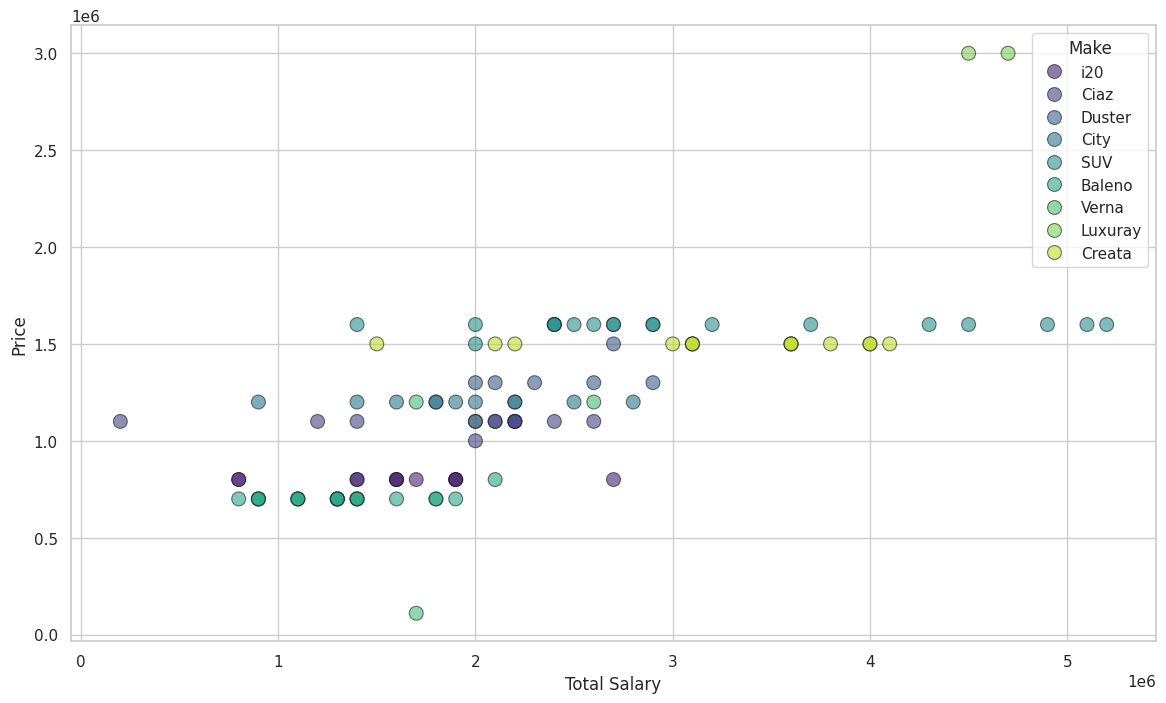

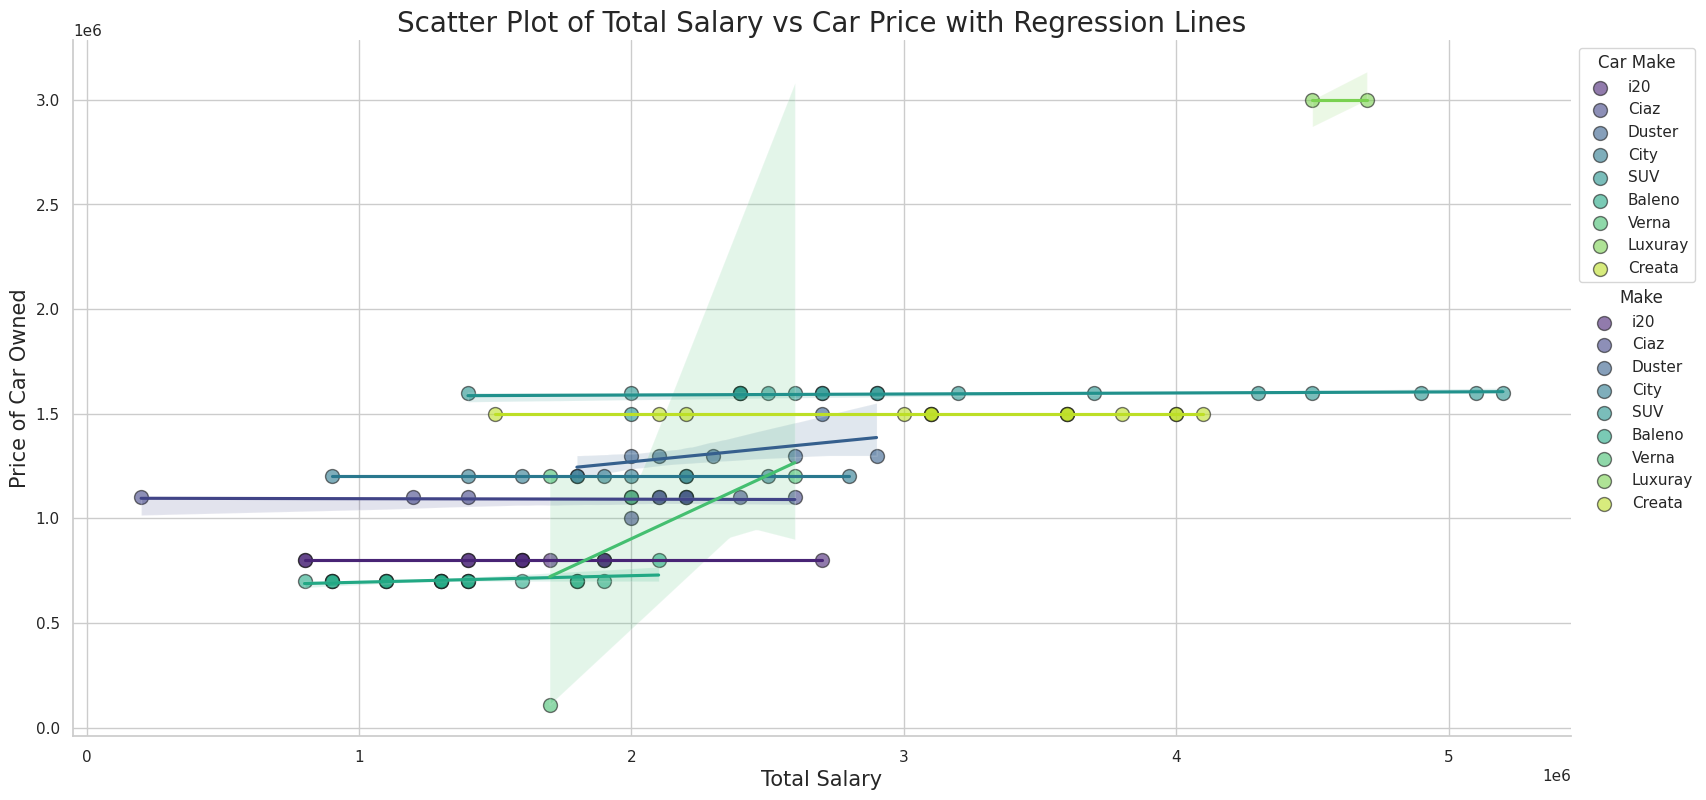

In [ ]:
#############                      Price of vehicle owned by Enhanced Scatter Plot with Seaborn and Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(14, 8))

# Scatter plot with hue based on 'Make'
scatter_plot = sns.scatterplot(x='Total Salary', y='Price', data=df, hue='Make', palette='viridis', s=100, edgecolor='k', alpha=0.6)

# Add regression lines for each make
sns.lmplot(x='Total Salary', y='Price', data=df, hue='Make', palette='viridis', aspect=2, height=8, scatter_kws={'s': 100, 'alpha': 0.6, 'edgecolor': 'k'})

# Customize the plot
plt.title('Scatter Plot of Total Salary vs Car Price with Regression Lines', fontsize=20)
plt.xlabel('Total Salary', fontsize=15)
plt.ylabel('Price of Car Owned', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Car Make")
plt.grid(True)

# Show the plot
plt.show()




In [ ]:
import plotly.express as px

# Create the interactive scatter plot
fig = px.scatter(df, x='Total Salary', y='Price', color='Make', title='Scatter Plot of Total Salary vs Car Price',
                 labels={'Total Salary':'Total Salary', 'Price':'Price of Car Owned'},
                 trendline='ols', size_max=10, template='plotly_white')

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
    legend_title_font_size=12,
    legend=dict(x=1, y=1)
)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide



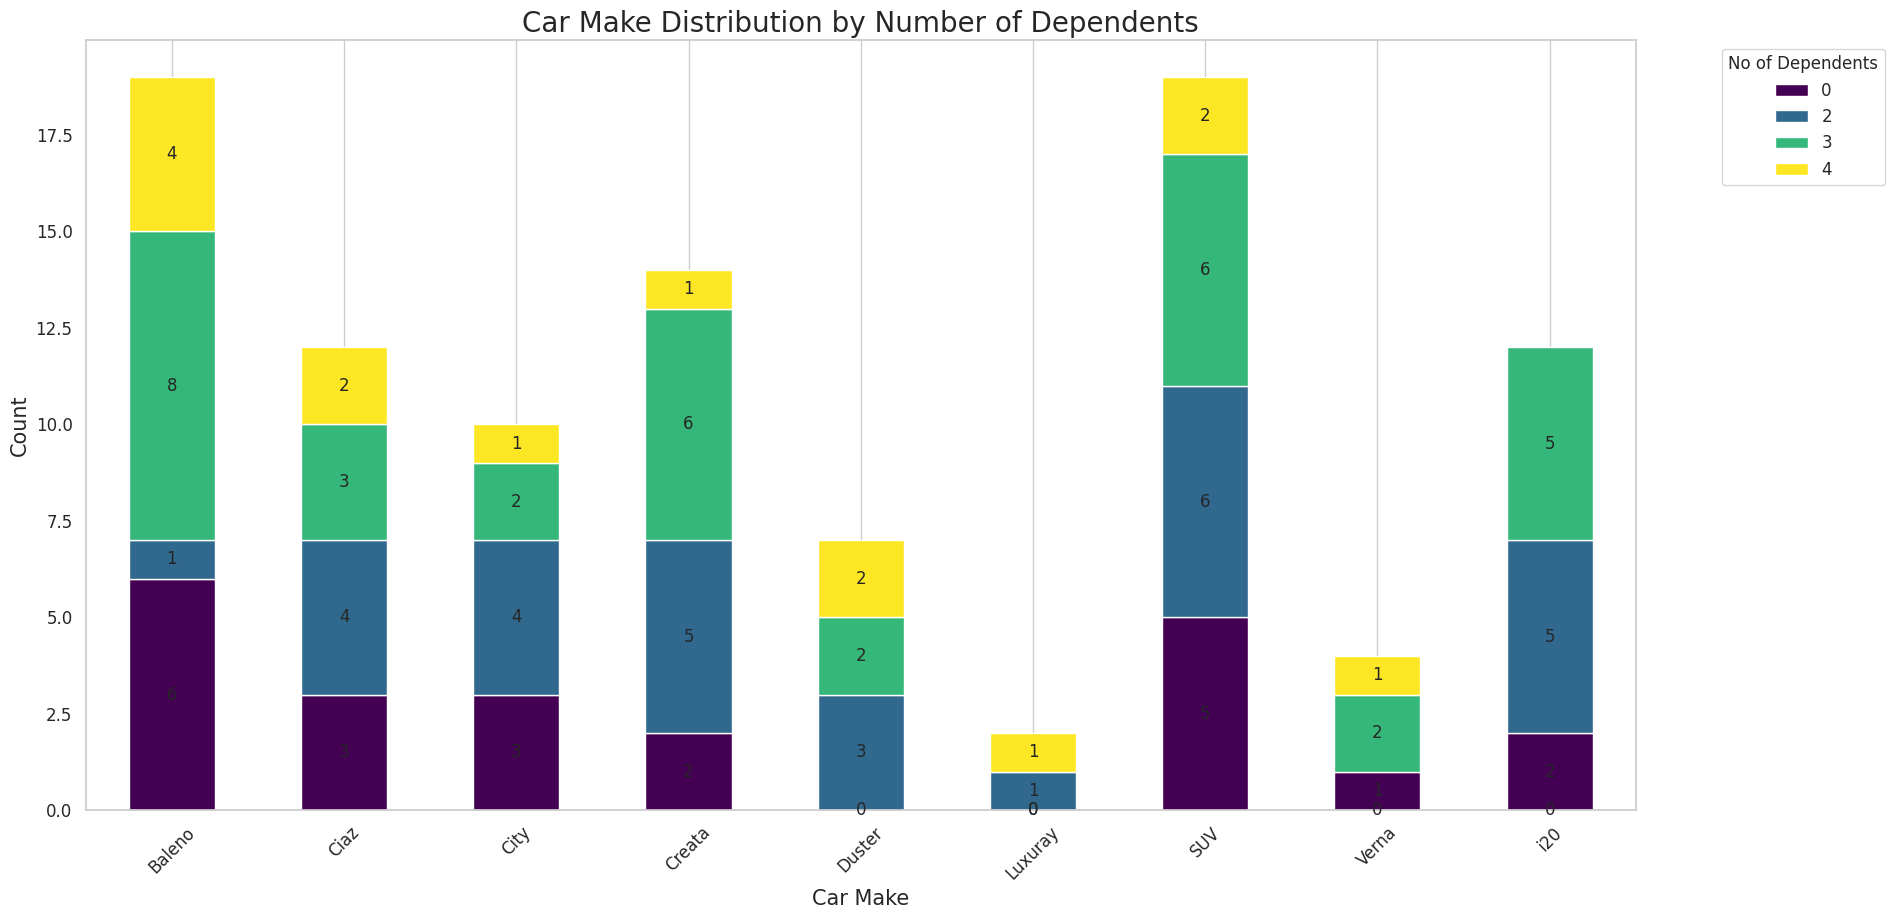

In [ ]:
######       Relation between number of dependents on a consumer and the vehicles they tend to purchase
#####            By Advanced Stacked Bar Plot with Data Labels using Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
df_plot = df.copy()

# Pivot the data for stacked bar plot
df_pivot = df_plot.pivot_table(index='Make', columns='No of Dependents', aggfunc='size', fill_value=0)

# Plot stacked bar plot
fig, ax = plt.subplots(figsize=(20, 10))
df_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Customize the plot
plt.title('Car Make Distribution by Number of Dependents', fontsize=20)
plt.xlabel('Car Make', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='No of Dependents', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Show the plot
plt.show()



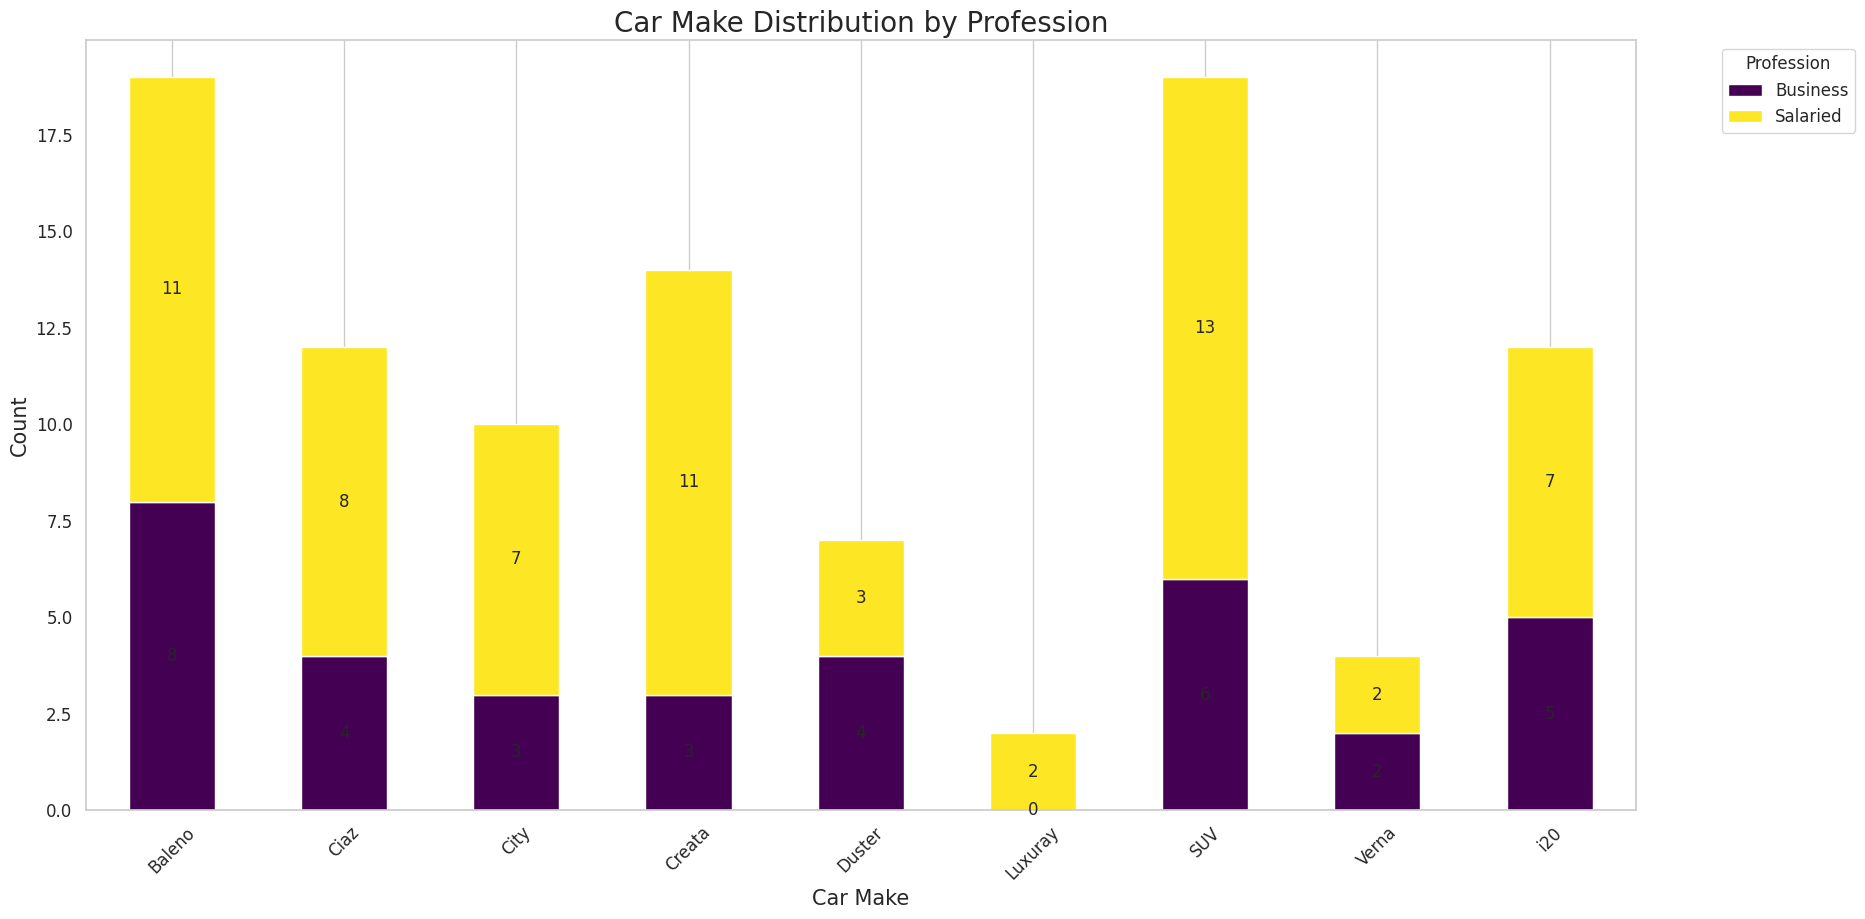

In [ ]:
#########           Relation between consumers profession and the vehicles they tend to purchase
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
df_plot = df.copy()

# Pivot the data for stacked bar plot
df_pivot = df_plot.pivot_table(index='Make', columns='Profession', aggfunc='size', fill_value=0)

# Plot stacked bar plot
fig, ax = plt.subplots(figsize=(20, 10))
df_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Customize the plot
plt.title('Car Make Distribution by Profession', fontsize=20)
plt.xlabel('Car Make', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from google.colab import files

# Upload the dataset
uploaded = files.upload()
file_path_geographic_latest = list(uploaded.keys())[0]
data_geographic_latest = pd.read_csv(file_path_geographic_latest)

# Expanded coordinates for all unique locations
location_coordinates = {
    'Mumbai': [19.0760, 72.8777],
    'Pune': [18.5204, 73.8567],
    'Chennai': [13.0827, 80.2707],
    'Coimbatore': [11.0168, 76.9558],
    'Hyderabad': [17.3850, 78.4867],
    'Jaipur': [26.9124, 75.7873],
    'Kochi': [9.9312, 76.2673],
    'Kolkata': [22.5726, 88.3639],
    'Delhi': [28.7041, 77.1025],
    'Bangalore': [12.9716, 77.5946],
    'Ahmedabad': [23.0225, 72.5714]
}

# Add coordinates to the dataset
data_geographic_latest['Latitude'] = data_geographic_latest['Location'].map(lambda x: location_coordinates[x][0] if x in location_coordinates else None)
data_geographic_latest['Longitude'] = data_geographic_latest['Location'].map(lambda x: location_coordinates[x][1] if x in location_coordinates else None)

# Create a color palette for car makes
make_colors = {
    'Toyota': 'blue',
    'Honda': 'green',
    'Ford': 'red',
    'BMW': 'purple',
    'Hyundai': 'orange',
    'Other': 'gray'  # Default color for other makes
}

# Create a base map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Plot each location on the map with different colors for each car make
for idx, row in data_geographic_latest.dropna(subset=['Latitude', 'Longitude']).iterrows():
    make = row['Make'] if row['Make'] in make_colors else 'Other'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Location: {row['Location']}<br>Car Make: {row['Make']}<br>Price: {row['Price']}",
        icon=folium.Icon(color=make_colors[make], icon='info-sign')
    ).add_to(marker_cluster)

# Save and display the map
m.save('electric_vehicle_map_with_makes.html')
m


Saving Electric Vehicle market in India using Segmentation .csv to Electric Vehicle market in India using Segmentation  (14).csv


<ipython-input-96-8e7289200c59>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




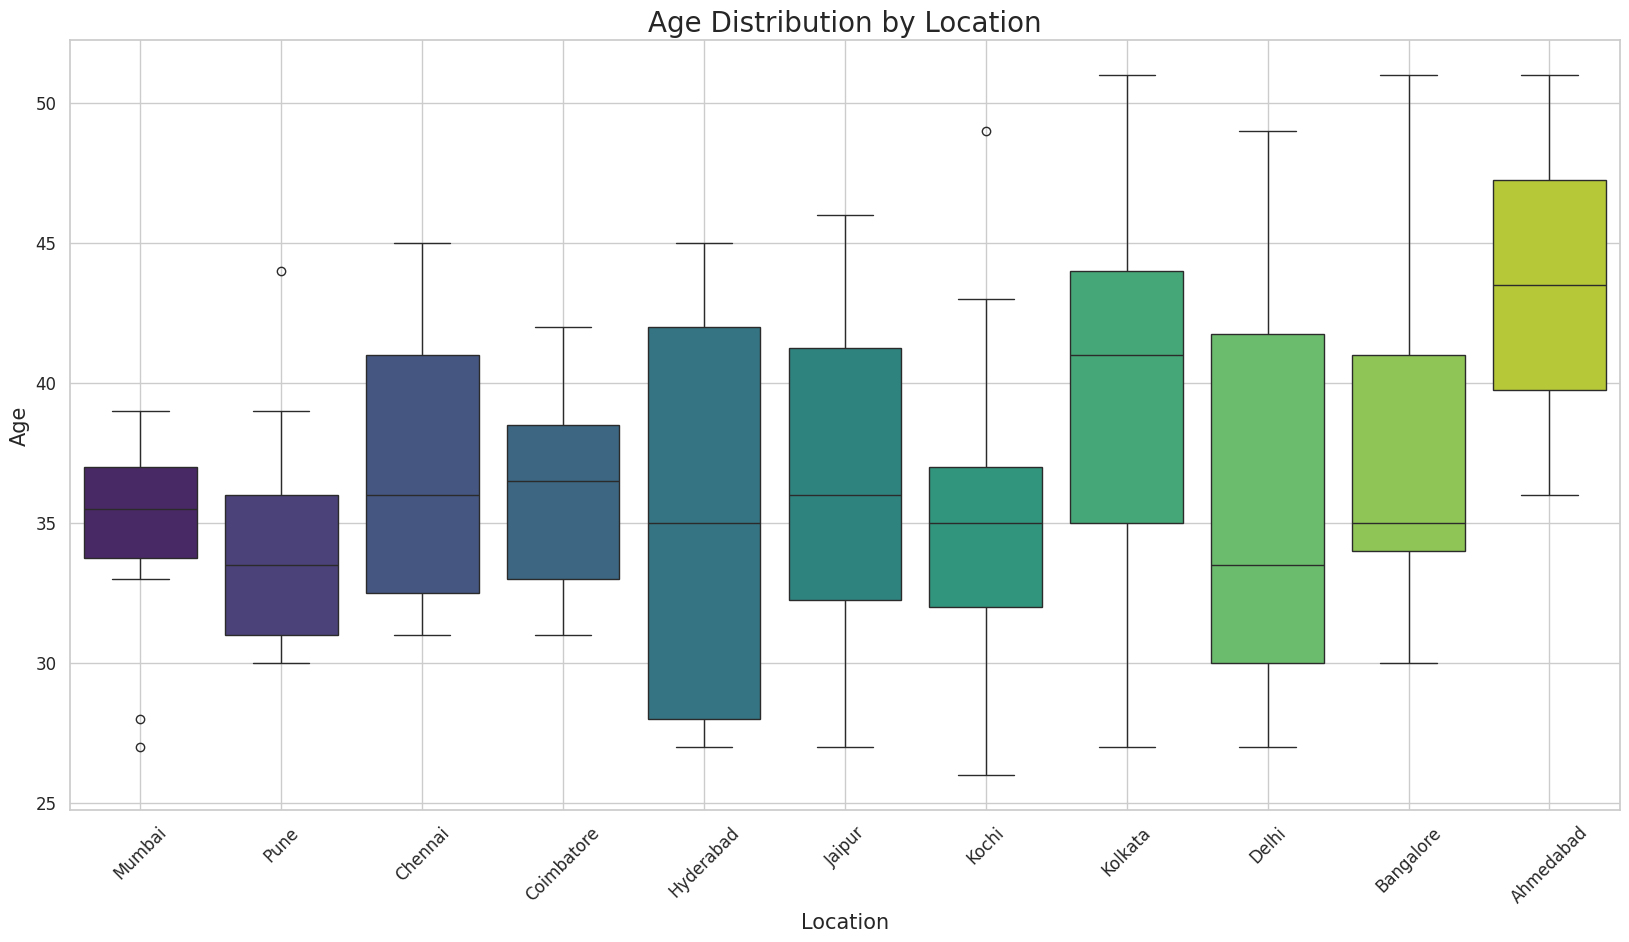

In [ ]:
# Create a box plot for age distribution by location
plt.figure(figsize=(20, 10))
sns.boxplot(x='Location', y='Age', data=data_geographic_latest, palette='viridis')
plt.title('Age Distribution by Location', fontsize=20)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

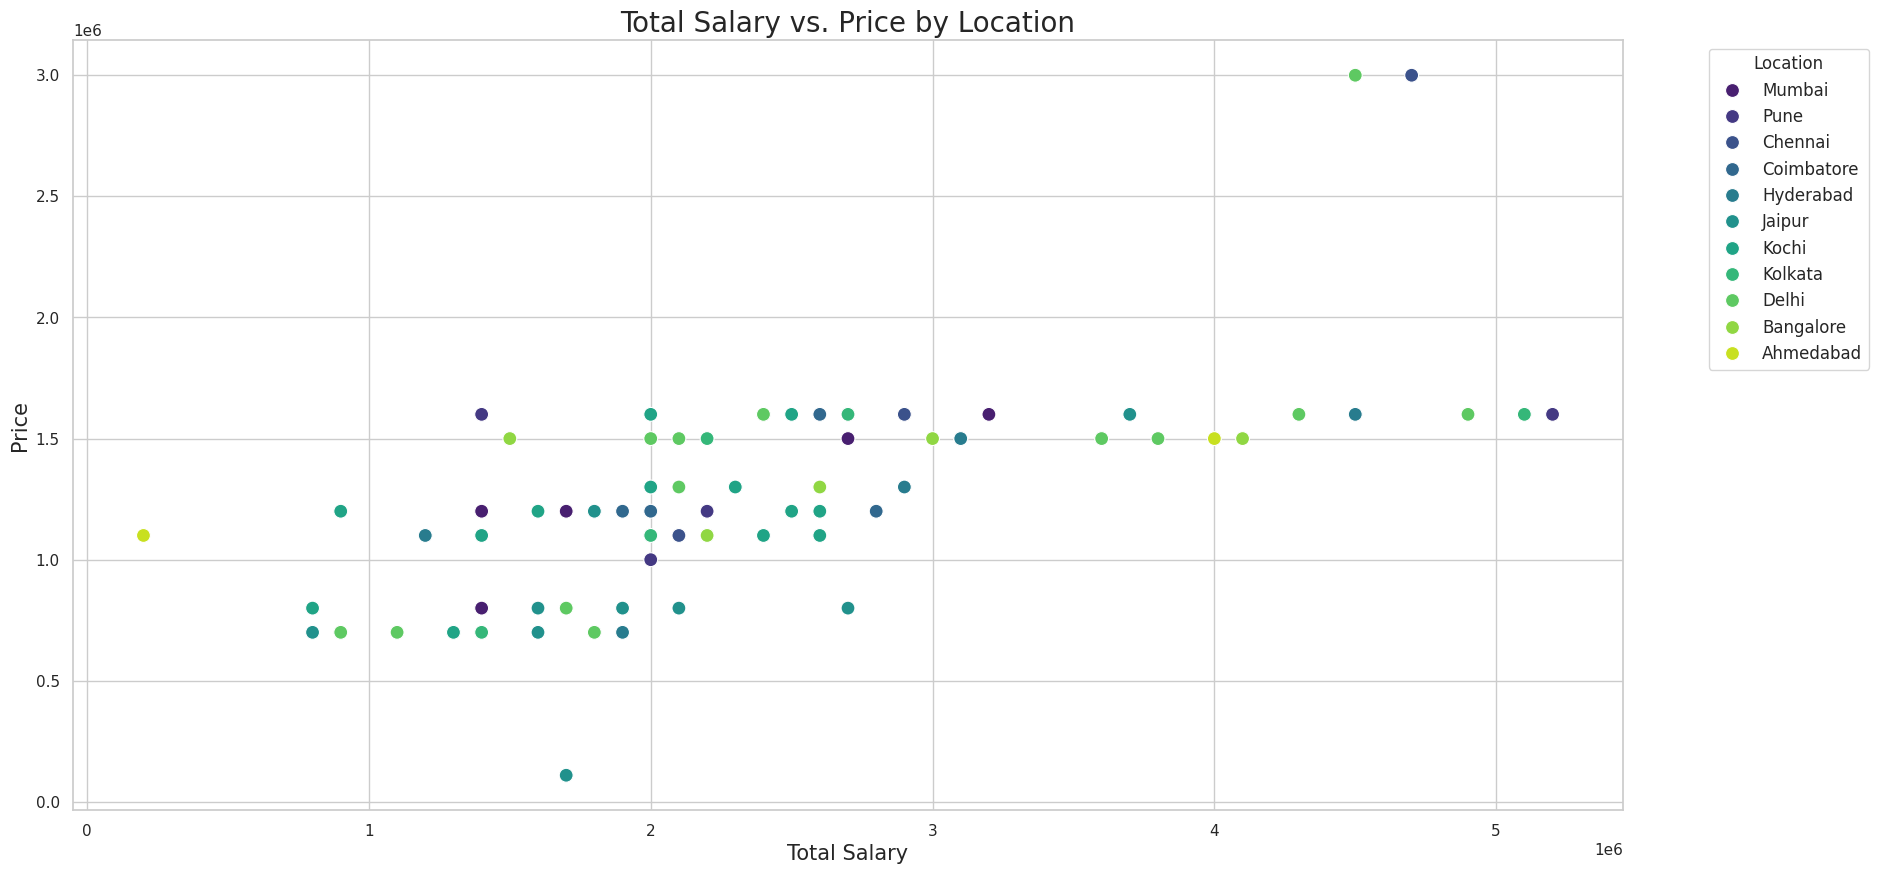

In [ ]:
# Create a scatter plot for total salary vs. price by location
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Total Salary', y='Price', hue='Location', data=data_geographic_latest, palette='viridis', s=100)
plt.title('Total Salary vs. Price by Location', fontsize=20)
plt.xlabel('Total Salary', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)
plt.show()
